Plot regions coverage percentage in the spinal cord.

This showcases that any brainglobe atlases should be supported.

Here we're going to quantify the percentage of area of each spinal cord regions innervated by axons.

The "area µm^2" measurement for each annotations can be created in QuPath with a pixel classifier, using the Measure button.

We're going to consider that the "area µm^2" measurement generated by the pixel classifier is an object count.  
`cuisto` computes a density, which is the count in each region divided by its aera.  
Therefore, in  this case, it will be actually the fraction of area covered by fibers in a given color.

The data was generated using QuPath with a pixel classifier on toy data.

In [1]:
import pandas as pd

import cuisto

In [2]:
# Full path to your configuration file, edited according to your need beforehand
config_file = "../../resources/demo_config_fibers.toml"

In [3]:
# - Files
# not important if only one animal
animal = "animalid1-SC"
# set the full path to the annotations tsv file from QuPath
annotations_file = "../../resources/fibers_measurements_annotations.tsv"

In [4]:
# get configuration
cfg = cuisto.config.Config(config_file)

In [5]:
# read data
df_annotations = pd.read_csv(annotations_file, index_col="Object ID", sep="\t")
df_detections = pd.DataFrame()  # empty DataFrame

# remove annotations that are not brain regions
df_annotations = df_annotations[df_annotations["Classification"] != "Region*"]
df_annotations = df_annotations[df_annotations["ROI"] != "Rectangle"]

# have a look
display(df_annotations.head())

,Image,Object type,Name,Classification,Parent,ROI,Centroid X µm,Centroid Y µm,Fibers: EGFP area µm^2,Fibers: DsRed area µm^2,ID,Side,Parent ID,Area µm^2,Perimeter µm
Object ID,,,,,,,,,,,,,,,
dcfe5196-4e8d-4126-b255-a9ea393c383a,animalid1-SC_s1.ome.tiff,Annotation,Root,NaN,Root object (Image),Geometry,1353.70,1060.00,108993.1953,15533.3701,NaN,NaN,NaN,3172474.0,9853.3
acc74bc0-3dd0-4b3e-86e3-e6c7b681d544,animalid1-SC_s1.ome.tiff,Annotation,root,Right: root,Root,Polygon,864.44,989.95,39162.8906,5093.2798,250.0,0.0,NaN,1603335.7,4844.2
94571cf9-f22b-453f-860c-eb13d0e72440,animalid1-SC_s1.ome.tiff,Annotation,WM,Right: WM,root,Geometry,791.00,1094.60,20189.0469,2582.4824,130.0,0.0,250.0,884002.0,7927.8
473d65fb-fda4-4721-ba6f-cc659efc1d5a,animalid1-SC_s1.ome.tiff,Annotation,vf,Right: vf,WM,Polygon,984.31,1599.00,6298.3574,940.4100,70.0,0.0,130.0,281816.9,2719.5
449e2cd1-eca2-4708-83fe-651f378c3a14,animalid1-SC_s1.ome.tiff,Annotation,df,Right: df,WM,Polygon,1242.90,401.26,1545.0750,241.3800,74.0,0.0,130.0,152952.8,1694.4


In [6]:
# get distributions per regions, spatial distributions and coordinates
df_regions, dfs_distributions, df_coordinates = cuisto.process.process_animal(
    animal, df_annotations, df_detections, cfg, compute_distributions=False
)

# convert the "density µm^-2" column, which is actually the coverage fraction, to a percentage
df_regions["density µm^-2"] = df_regions["density µm^-2"] * 100

# have a look
display(df_regions.head())

,Name,hemisphere,Area µm^2,Area mm^2,area µm^2,density µm^-2,density mm^-2,coverage index,relative count,relative density,channel,animal
0,10Sp,Contra.,1749462.18,1.749462,53117.3701,3.036211,30362.113973,1612.755645,0.036535,0.033062,Negative,animalid1-SC
0,10Sp,Contra.,1749462.18,1.749462,5257.1025,0.300498,3004.98208,15.797499,0.030766,0.02085,Positive,animalid1-SC
1,10Sp,Ipsi.,1439105.93,1.439106,64182.9823,4.459921,44599.206328,2862.51007,0.023524,0.023265,Negative,animalid1-SC
1,10Sp,Ipsi.,1439105.93,1.439106,8046.3375,0.559121,5591.205854,44.988729,0.028911,0.022984,Positive,animalid1-SC
2,10Sp,both,3188568.11,3.188568,117300.3524,3.678778,36787.783216,4315.219935,0.028047,0.025734,Negative,animalid1-SC


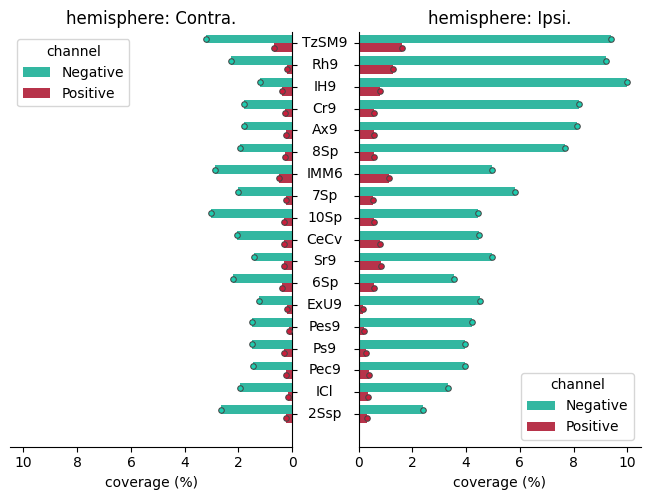

In [7]:
# plot distributions per regions
fig_regions = cuisto.display.plot_regions(df_regions, cfg)
# specify which regions to plot
# fig_regions = hq.display.plot_regions(df_regions, cfg, names_list=["Rh9", "Sr9", "8Sp"])

# save as svg
# fig_regions[0].savefig(r"C:\Users\glegoc\Downloads\nice_figure.svg")